# **💡DATA SCHOOL PROJECT04**  
**┗ 카드거래이력 분석을 통한 고객특성파악**
---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction
* ⚙️Process01
* ⚙️Process02
* ⚙️Process03

## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 카드거래이력 분석을 통한 고객특성파악
```  

> **프로젝트유형**

```
▶ 데이터 EDA 및 인사이트 추출
```

> **학습목표**

```
▶ 데이터를 Read하고 전처리할 수 있는 역량 습득
▶ 가설을 수립하고 데이터 핸들링을 통해 인사이트를 추출할 수 있는 역량 습득
```


## **문제상황 Introduction**
---
> **시나리오** 💳

```
A사는 신규 브랜드의 점포를 입점 시키려는 계획을 가지고 있다. 신규 브랜드이기 때문에 과거 상권에 대한 정보가 없어,   
어느 지역에 입점을 시켜야할지 고민이 많다. 고민 끝에 후보 지역A를 최종 후보로 정했다.   
하지만 자신들의 브랜드와 해당 지역에 거주하는 고객의 소비성향과 비슷한지가 아직 의문이다.  
따라서 신용카드 Spending data를 활용하여 고객의 소비 성향을 파악하고자 한다.  
파악된 고객의 소비성향과 브랜드의 성향이 맞는지 비교해보고 최종 결정을 내리고자 한다.

```  

> **문제정의**

```
▶ 신규 브랜드 입점 상권 불분명
```  

> **기대효과**

```
▶ 신규 상권 입점 여부 결정 및 상권의 고객 소비성향 파악
```

> **해결방안**

```
▶ 카드 Spending data 활용 지역 거주 고객 소비성향 파악 및 브랜드와 매칭을 통해 입점 결정
```

> **성과측정**  

```
▶ 신규 진입 결정 여부
```

> **현업적용**  

```
▶ 인사이트 Report 작성 및 보고
```

> **데이터 살펴보기**

* 상점 ID별 카드 Spending data
* 데이터 명세 ⬇

|store_id|date|time|card_id|amount|installments|
|:---:|:---:|:---:|:---:|:---:|:---:|
|상점 ID|날짜|시간|카드 ID|매출액(음수는 거래취소)|할부개월, 일시불은 빈문자열|
|dats_of_week|holyday|
|요일(월요일0, 일요일6)|공휴일 여부|


In [43]:
# warnings 제거
import warnings
warnings.filterwarnings('ignore')

In [44]:
# Data read
import pandas as pd
df=pd.read_csv('../data/S_PJT04_DATA.csv')
df.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


#### **💡Process01**  
#### **┗ 업종별 사용 형태 분석**  

#### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  


In [45]:
# data 형태 확인
print('df', df.shape)
# 3,362,796 rows , 8cols

df (3362796, 8)


In [46]:
# data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_id      int64  
 1   date          object 
 2   time          object 
 3   card_id       object 
 4   amount        int64  
 5   installments  float64
 6   days_of_week  int64  
 7   holyday       int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


In [47]:
# Null 값 확인 
print(df.isnull().sum())

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64


In [48]:
# Outlier 확인, 음수값 확인
df.describe()

,store_id,amount,installments,days_of_week,holyday
count,3.362796e+06,3.362796e+06,16860.000000,3.362796e+06,3.362796e+06
mean,8.323770e+02,1.459623e+02,3.459490,3.066320e+00,4.431283e-02
std,5.468544e+02,6.017306e+02,2.382382,1.976153e+00,2.057892e-01
min,0.000000e+00,-2.500000e+05,2.000000,0.000000e+00,0.000000e+00
25%,3.350000e+02,3.200000e+01,3.000000,1.000000e+00,0.000000e+00
50%,8.220000e+02,7.500000e+01,3.000000,3.000000e+00,0.000000e+00
75%,1.342000e+03,1.500000e+02,3.000000,5.000000e+00,0.000000e+00
max,1.799000e+03,2.500000e+05,36.000000,6.000000e+00,1.000000e+00


In [49]:
# 할부개월 col에서 일시불은 빈문자열이기 때문에 0으로 변환 처리
df['installments'].fillna(0,inplace=True)


In [50]:
# Null 값 확인
print(df.isnull().sum())

store_id        0
date            0
time            0
card_id         0
amount          0
installments    0
days_of_week    0
holyday         0
dtype: int64


### · 업종별 이용 및 매출 비중 분석
---  

In [51]:
# 총 1,775개의 Unique한 상점이 존재
df['store_id'].value_counts()

store_id
0       68773
753     39318
105     36063
1342    33335
428     33285
        ...  
1605        1
991         1
1263        1
1530        1
632         1
Name: count, Length: 1775, dtype: int64

In [52]:
# 업종별 이용 횟수 비중
df_store=pd.DataFrame(df['store_id'].value_counts()).reset_index()

df_store.columns = ['store_id','cnt']
df_store.head()

,store_id,cnt
0,0,68773
1,753,39318
2,105,36063
3,1342,33335
4,428,33285


In [53]:
# 업종별 이용 횟수 비중 Top 10
df_store['total']=df_store['cnt'].sum()
df_store['ratio']=round((df_store['cnt'] / df_store['total'])*100,2)
df_store.head(10)

,store_id,cnt,total,ratio
0,0,68773,3362796,2.05
1,753,39318,3362796,1.17
2,105,36063,3362796,1.07
3,1342,33335,3362796,0.99
4,428,33285,3362796,0.99
5,221,31409,3362796,0.93
6,161,27170,3362796,0.81
7,1038,25694,3362796,0.76
8,323,25221,3362796,0.75
9,1366,24946,3362796,0.74


In [54]:
# 업종별 매출액 비중- groupby.sum()활용
df_amt=pd.DataFrame(df['amount'].groupby(df['store_id']).sum()).reset_index()
df_amt.head(5)

,store_id,amount
0,0,5234611
1,1,147950
2,2,1615060
3,3,62781
4,4,270312


In [55]:
# 매출액 기준 내림차순 정렬
df_amt=df_amt.sort_values(by=['amount'],ascending=False)
df_amt.head()

,store_id,amount
746,753,9474601
1326,1342,7301327
158,161,5236075
0,0,5234611
948,958,4965728


In [56]:
# 업종별 매출액 비중 Top10
df_amt['total']=df_amt['amount'].sum()
df_amt['ratio']=round((df_amt['amount'] / df_amt['total'])*100,2)
df_amt.head(10)

,store_id,amount,total,ratio
746,753,9474601,490841453,1.93
1326,1342,7301327,490841453,1.49
158,161,5236075,490841453,1.07
0,0,5234611,490841453,1.07
948,958,4965728,490841453,1.01
1065,1076,4860885,490841453,0.99
801,810,3677501,490841453,0.75
1013,1024,3330293,490841453,0.68
480,486,3235482,490841453,0.66
590,597,2999180,490841453,0.61


#### **💡Process02**  
### **┗ 핵심 업종 탐색**  


#### · 업종별 이용 고객수 분석
---

In [57]:
# 상위에서 정의한 이용 비중 Data(cnt)
df_store.columns=['store_id','cnt','cnt_total','cnt_ratio']
df_store.head()

,store_id,cnt,cnt_total,cnt_ratio
0,0,68773,3362796,2.05
1,753,39318,3362796,1.17
2,105,36063,3362796,1.07
3,1342,33335,3362796,0.99
4,428,33285,3362796,0.99


In [58]:
# 상위에서 정의한 이용 비중 Data(amt)
df_amt.columns=['store_id','amt','amt_total','amt_ratio']
df_amt.head()

,store_id,amt,amt_total,amt_ratio
746,753,9474601,490841453,1.93
1326,1342,7301327,490841453,1.49
158,161,5236075,490841453,1.07
0,0,5234611,490841453,1.07
948,958,4965728,490841453,1.01


In [59]:
#data merge (cnt & amt)
df_merge=pd.merge(df_store,df_amt,how='left',on='store_id')
df_merge.head()

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio
0,0,68773,3362796,2.05,5234611,490841453,1.07
1,753,39318,3362796,1.17,9474601,490841453,1.93
2,105,36063,3362796,1.07,2991082,490841453,0.61
3,1342,33335,3362796,0.99,7301327,490841453,1.49
4,428,33285,3362796,0.99,1312204,490841453,0.27


In [60]:
# 이용 고객수(Unique)
df_customer=pd.DataFrame(df['card_id'].groupby(df['store_id']).nunique()).reset_index()
df_customer.columns=['store_id','customer']
df_customer['customer_total']=df['card_id'].nunique()
df_customer['customer_ratio']=round((df_customer['customer']/df_customer['customer_total'])*100,2)
df_customer.head()

,store_id,customer,customer_total,customer_ratio
0,0,12727,922522,1.38
1,1,8,922522,0.00
2,2,9053,922522,0.98
3,3,231,922522,0.03
4,4,1176,922522,0.13


In [61]:
#  이용 고객수(Unique) 기준 내림차순 정렬
df_customer.sort_values(by=['customer_ratio'],ascending=False).head(10)

,store_id,customer,customer_total,customer_ratio
423,428,18456,922522,2.00
218,221,17161,922522,1.86
289,293,14915,922522,1.62
1326,1342,14789,922522,1.60
932,942,13760,922522,1.49
1196,1209,13512,922522,1.46
0,0,12727,922522,1.38
1027,1038,12523,922522,1.36
746,753,11960,922522,1.30
123,126,11070,922522,1.20


In [62]:
# 이용 고객수 Left join
df_merge=pd.merge(df_merge,df_customer,how='left',on='store_id')
df_merge.head()

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00


####  1회 사용 금액 / 객단가 분석
---

In [66]:
# 1 회 사용 금액
df_merge['amt_per_use'] = round(df_merge['amt']/df_merge['cnt'],0)

# 객 단가
df_merge['cus_per_use'] = round(df_merge['amt']/df_merge['customer'],0)

df_merge.head()

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use,core_store
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,76.0,411.0,1.4725
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,241.0,792.0,1.4815
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89,83.0,364.0,0.8460
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,219.0,494.0,1.3785
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,39.0,71.0,1.0915


#### · 핵심업종 정의
---

In [68]:
#  이용 비중, 이용 금액 비중, 이용 고객수 비중에 가중치를 적용하여 새로운 Score를 정의
#  cnt_ratio(a)
#  amt_ratio(b)
#  customer_ratio(c)

a = 0.3
b = 0.35
c = 0.35

df_merge['core_store'] = df_merge['cnt_ratio']*a + df_merge['amt_ratio']*b + df_merge['customer_ratio']*c
df_merge.head()

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use,core_store
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,76.0,411.0,1.4725
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,241.0,792.0,1.4815
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89,83.0,364.0,0.8460
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,219.0,494.0,1.3785
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,39.0,71.0,1.0915


In [70]:
#  Min-max 표준화를 통해 100점 만점의 점수로 변환
df_merge['core_store_scaled'] = df_merge['core_store'].apply(lambda x: (x - df_merge['core_store'].min())  / (df_merge['core_store'].max() - df_merge['core_store'].min()) )
df_merge['core_store_scaled'] = round(df_merge['core_store_scaled'] * 100,0)
df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use,core_store,core_store_scaled
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,76.0,411.0,1.4725,99.0
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,241.0,792.0,1.4815,100.0
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89,83.0,364.0,0.8460,57.0
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,219.0,494.0,1.3785,93.0
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,39.0,71.0,1.0915,74.0


In [71]:
# store id = 753, 0, 1342, 221, 428 / 총 5개의 store을 핵심업종으로 정의 (※ 내림차순 정렬)
df_merge.sort_values(by=['core_store_scaled'], ascending=False).head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use,core_store,core_store_scaled
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,241.0,792.0,1.4815,100.0
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,76.0,411.0,1.4725,99.0
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,219.0,494.0,1.3785,93.0
5,221,31409,3362796,0.93,2513245,490841453,0.51,17161,922522,1.86,80.0,146.0,1.1085,75.0
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,39.0,71.0,1.0915,74.0


#### **💡Process03**  
#### **┗ 핵심업종 추가 분석**  


####  핵심업종 주말/주중/공휴일 분석
---

In [72]:
df.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0


In [73]:
#  상위에서 정의한 핵심업종 Data만 가져오기
df_core_store=df[df['store_id'].isin([753,0,1342,221,428])]
df_core_store['store_id'].value_counts()

store_id
0       68773
753     39318
1342    33335
428     33285
221     31409
Name: count, dtype: int64

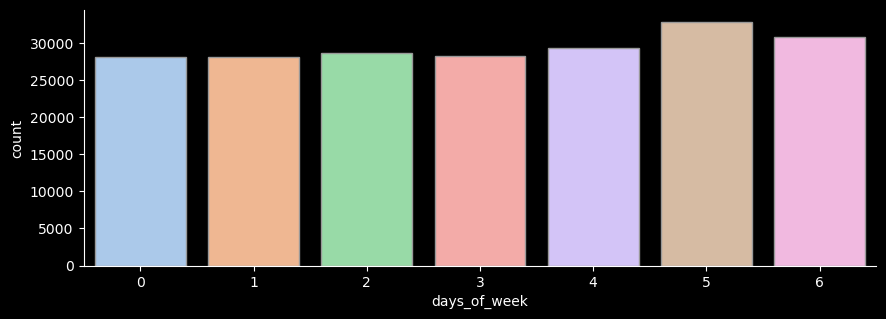

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

#  0-월요일, ... , 5-토요일, 6-일요일
#  토요일 1위, 일요일 2위 ..
sns.catplot(x="days_of_week", kind="count",palette="pastel", edgecolor=".6",data=df_core_store);
plt.gcf().set_size_inches(10, 3)

In [74]:
# 주말(1), 주중(0) 소비형태 비교
import numpy as np

df_core_store['weekend']=np.where(df_core_store['days_of_week'].isin([5,6]),1,0)
df_core_store['weekend'].value_counts()

weekend
0    142498
1     63622
Name: count, dtype: int64

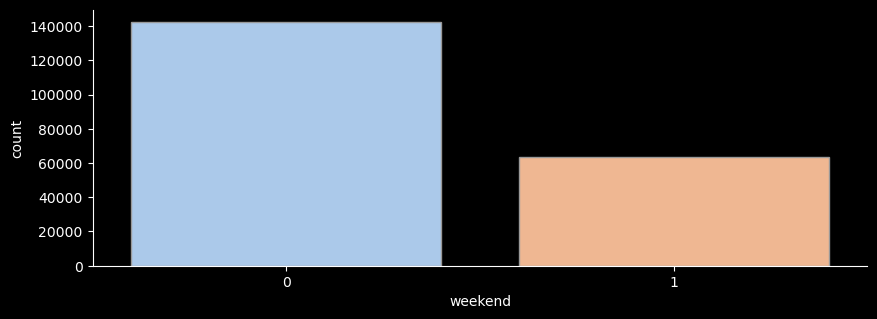

In [75]:
#  주말(1), 주중(0) Plotting
sns.catplot(x='weekend',kind='count',palette='pastel',edgecolor='.6',data=df_core_store)
plt.gcf().set_size_inches(10,3)

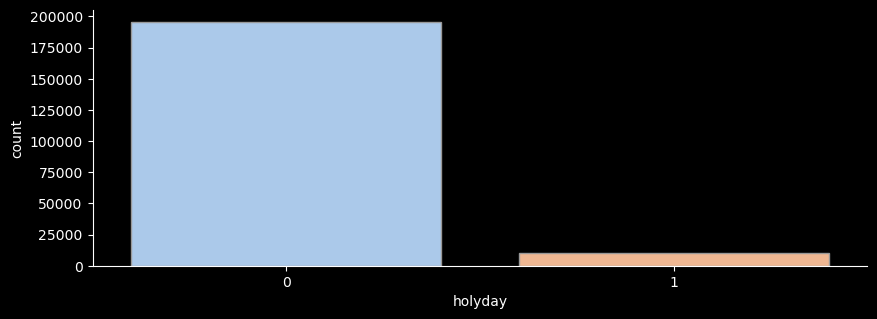

In [77]:
# holyday 여부에 따른 핵심업종 소비 횟수 비교
sns.catplot(x='holyday',kind='count',palette='pastel',edgecolor='.6',data=df_core_store)
plt.gcf().set_size_inches(10,3)

####  핵심업종 일시불 및 할부결제 분석
---

In [78]:
df_core_store.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0


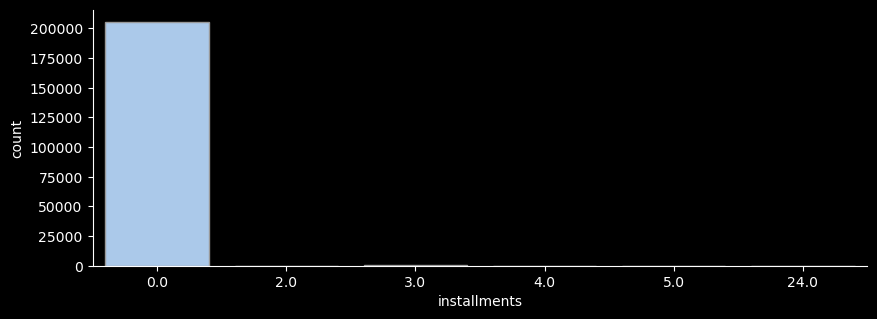

In [80]:
#  0-일시불 그외는 N 개월 할부
sns.catplot(x='installments',kind='count',palette='pastel',edgecolor='.6',data=df_core_store)
plt.gcf().set_size_inches(10,3)

In [81]:
# 99%이상이 일시불
df_core_store['installments'].value_counts()

installments
0.0     205454
3.0        477
2.0        172
5.0         12
24.0         3
4.0          2
Name: count, dtype: int64

####  핵심업종 취소금액 분석
---

In [82]:
df_core_store.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0


In [85]:
abs(df_core_store[df_core_store['amount']<0]['amount'].sum()/df_core_store['amount'].sum())*100

0.8132183681150494

In [86]:
#  753, 0, 1342, 221, 428
#  'Store 0'이 가장 많은 취소 금액 비중
df1 = df_core_store[df_core_store['store_id']==753]
df2 = df_core_store[df_core_store['store_id']==0]
df3 = df_core_store[df_core_store['store_id']==1342]
df4 = df_core_store[df_core_store['store_id']==221]
df5 = df_core_store[df_core_store['store_id']==428]


print("store(753) :", abs(df1[df1['amount'] < 0]['amount'].sum()) / df1['amount'].sum() * 100)
print("store(0) :", abs(df2[df2['amount'] < 0]['amount'].sum()) / df2['amount'].sum() * 100)
print("store(1342) :", abs(df3[df3['amount'] < 0]['amount'].sum()) / df3['amount'].sum() * 100)
print("store(221) :", abs(df4[df4['amount'] < 0]['amount'].sum()) / df4['amount'].sum() * 100)
print("store(428) :", abs(df5[df5['amount'] < 0]['amount'].sum()) / df5['amount'].sum() * 100)

store(753) : 0.38674979558505945
store(0) : 1.396741801826344
store(1342) : 0.5834555828002225
store(221) : 1.7059220251109624
store(428) : 1.1333603616510848


####  핵심업종 년도별 매출 비중 변화 분석
---

In [87]:
df_core_store.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0


In [88]:
#  Time data 처리
import datetime
df_core_store['Date_merge'] = df['date'].astype(str) + ' ' + df['time'].astype(str)
df_core_store['Date_merge'] = pd.to_datetime(df_core_store['Date_merge'])

In [89]:
#  2016년 8월 1일 ~ 2018년 7월 31일까지의 Data
df_core_store['Date_merge'].min(), df_core_store['Date_merge'].max()

(Timestamp('2016-08-01 00:14:51'), Timestamp('2018-07-31 23:56:14'))

In [90]:
#  년, 월로 시간데이터 분해
df_core_store['year'] = df_core_store['Date_merge'].dt.year
df_core_store['month'] = df_core_store['Date_merge'].dt.month
df_core_store.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend,Date_merge,year,month
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0,2016-12-14 18:05:31,2016,12
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0,2016-12-14 18:05:54,2016,12
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0,2016-12-19 12:42:31,2016,12
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0,2016-12-19 12:48:08,2016,12
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0,2016-12-19 13:31:08,2016,12


In [92]:
#  핵심업종별 매출 금액 by 년도
df_year=pd.DataFrame(df_core_store.groupby(['store_id','year'])['amount'].sum()).reset_index()
df_year.head()

,store_id,year,amount
0,0,2016,137336
1,0,2017,3235476
2,0,2018,1861799
3,221,2016,528397
4,221,2017,1318231


In [101]:
df_pivot=pd.pivot_table(df_year,
                        index='year',
                        columns='store_id',
                        values='amount')
df_pivot =df_pivot.reset_index()
df_pivot.columns.names=['']
df_pivot=df_pivot.set_index('year')
df_pivot=df_pivot.fillna(0)
df_pivot['total']=df_pivot.iloc[:,0]+df_pivot.iloc[:,1]+df_pivot.iloc[:,2]+df_pivot.iloc[:,3]+df_pivot.iloc[:,4]
df_pivot.iloc[:,0]

year
2016     137336.0
2017    3235476.0
2018    1861799.0
Name: 0, dtype: float64

In [102]:
#  total 금액으로 나눠서 매출 비중으로 변환
df_pivot.iloc[:,0] = (df_pivot.iloc[:,0] / df_pivot['total'])
df_pivot.iloc[:,1] = (df_pivot.iloc[:,1] / df_pivot['total'])
df_pivot.iloc[:,2] = (df_pivot.iloc[:,2] / df_pivot['total'])
df_pivot.iloc[:,3] = (df_pivot.iloc[:,3] / df_pivot['total'])
df_pivot.iloc[:,4] = (df_pivot.iloc[:,4] / df_pivot['total'])

df_pivot

,0,221,428,753,1342,total
year,,,,,,
2016,0.091778,0.353114,0.204048,0.351060,0.000000,1496393.0
2017,0.175251,0.071403,0.036021,0.440349,0.276977,18461950.0
2018,0.316759,0.113416,0.058163,0.139440,0.372223,5877645.0


In [103]:
df_pivot=df_pivot.drop(['total'],axis=1)
df_pivot

,0,221,428,753,1342
year,,,,,
2016,0.091778,0.353114,0.204048,0.351060,0.000000
2017,0.175251,0.071403,0.036021,0.440349,0.276977
2018,0.316759,0.113416,0.058163,0.139440,0.372223


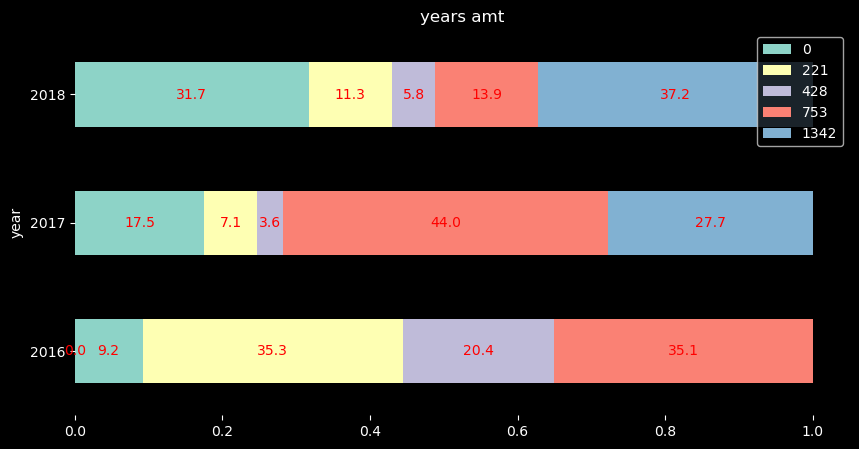

In [104]:
ax=df_pivot.plot(kind='barh',stacked=True,title='years amt',rot=0)
for p in ax.patches:
    left,bottom,width,height=p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100),xy=(left+width/2,bottom+height/2), ha='center',va='center',color='r')

plt.box(False)
plt.gcf().set_size_inches(10,5)
plt.show()